# Investigate simulations with shared soil column per pft for temperature and precipitation

Inne Vanderkelen - October 2023

## 1. Settings

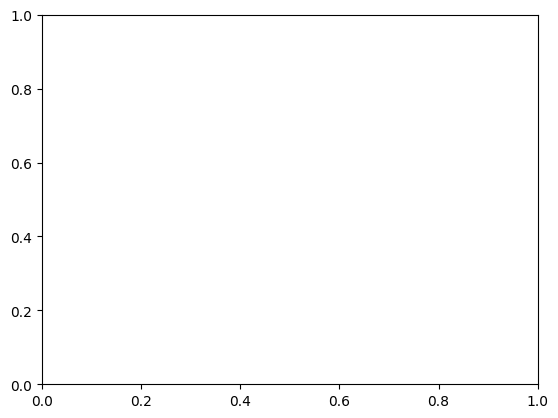

In [1]:
# laod modules 
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import regionmask 

# import own utils module
from iv_utils_daint import *
from ctsm_py.utils import * #info on ctsm utils: https://github.com/NCAR/ctsm_python_gallery 

# do plotting settings
set_plot_param()

# ignore all runtime warnings
warnings.filterwarnings('ignore')

In [2]:
# directory settings

# set directories
outdir = '/scratch/snx3000/ivanderk/'

# Define directory where processing is done 
procdir =  outdir + 'processing_4p1000/' 

# go to processing directory 
os.chdir(procdir)

In [6]:
# case settings

# define scenario
scenario = '4p1000'

# case settings
case_ctl = 'I2000Clm51Sp.hcru_hcru_mt13.pftsoilcol.CTL.spunup'
case_scen = 'I2000Clm51Sp.hcru_hcru_mt13.pftsoilcol.'+scenario+'.spunup'

case   = case_ctl
block  = 'lnd' 
stream = 'h0' 

# List of variables to import from file(s) in $indir matching $pattern.
variables = [ "TSA", "RAIN" ]

# discard 2004 until 2008 as spin up years
start_year, end_year = 2009, 2028 # 2028 

time_slice = slice(str(start_year)+"-01-01", str(end_year)+"-12-01")

## 2. Load data

### Load simulations

In [7]:
ds_ctl = import_case(case_ctl, myVars=variables, timeSlice=time_slice)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/snx3000/ivanderk/archive/I2000Clm51Sp.hcru_hcru_mt13.pftsoilcol.CTL.spunup/lnd/hist/'

### Load auxiliary data (soil levels, input dataset, wilting point etc) 

In [ ]:
# info on soil levels
# manually get soil level info from CLM
levsoi_thickness, levsoi_depth, levgrnd_thickness , levgrnd_depth = get_soildepths()

# get info on soil levels
levsoi = ds_ctl['levsoi'].values
levgrnd = ds_ctl['levgrnd'].values # all soil layers (deepest 5 layers are for thermodynamical calculations)

In [ ]:
# input data
# define variables to load from input dataset
input_variables = ['ORGANIC','PFTDATA_MASK','PCT_SAND','PCT_CLAY']

# load inputdata
ds_input, ds_input_scen, landmask = load_inputdata(scenario, input_variables, case_ctl)

In [ ]:
# get masks for sandy and clay soils

# define tresholds for pct sand and pct clay
pct_sand_treshold = 70
pct_clay_threshold = 40
da_sand_mask, da_clay_mask = get_texture_masks(pct_sand_treshold, pct_clay_threshold, ds_input, levsoi_thickness)



In [ ]:
# wilting point
# load precalculated wilting point datasets
da_wilting_h2osoi, da_wilting_h2osoi_scen = load_wilting_h2osoi(scenario) 

## 3. Analysis & plotting

### Plotting settings

In [10]:
da_t2m = ds_ctl['TSA']

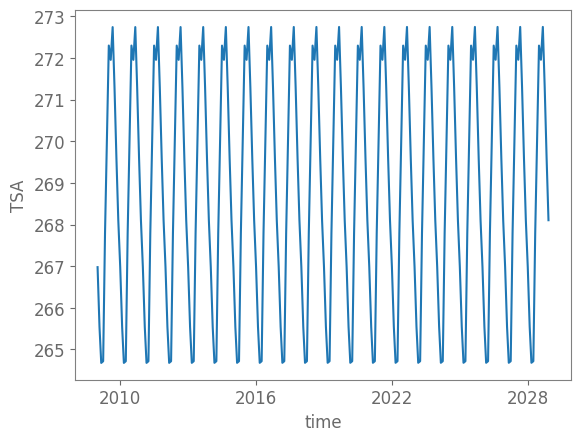

In [11]:
# plot global mean temoerature
da_t2m.mean(dim=('lat','lon')).plot()

In [12]:
da_rain = ds_ctl['RAIN']
da_rain

<xarray.DataArray 'RAIN' (time: 240, lat: 360, lon: 720)>
dask.array<rechunk-merge, shape=(240, 360, 720), dtype=float32, chunksize=(1, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2009-01-01 00:00:00 ... 2028-12-01 00:00:00
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Attributes:
    long_name:      atmospheric rain, after rain/snow repartitioning based on...
    units:          mm/s
    cell_methods:   time: mean
    landunit_mask:  unknown

## Look at dry and wet years
SPI: see https://climatedataguide.ucar.edu/climate-data/standardized-precipitation-index-spi

In [13]:
mask = regionmask.defined_regions.ar6.land.mask(da_rain)


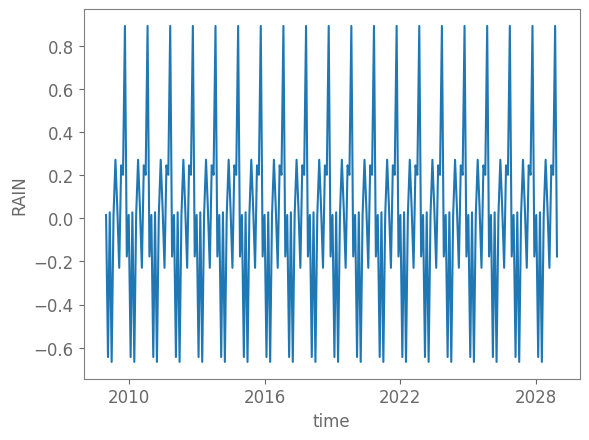

In [14]:
# annually accumulated precipitation per region
sec_per_month = 60*60*24*30

da_rain_mm_month = da_rain * sec_per_month

da_rain_mean = da_rain_mm_month.mean('time')

da_rain_std = da_rain_mm_month.std('time')

da_spi = (da_rain_mm_month - da_rain_mean)/da_rain_std

region=3
da_spi.where(mask==region).mean(dim=('lat','lon')).plot()

In [15]:
 SPI = (P-P*) /  σp

where P = precipitation

p* = mean precipitation

σp = standard deviation of precipitation

SyntaxError: invalid syntax (679053571.py, line 1)